<a href="https://colab.research.google.com/github/fmustafa176/ml-training-projects/blob/main/hiring_multi_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from sklearn import linear_model

In [ ]:
# load dataset

path = kagglehub.dataset_download("rohitsharma341/hiring-csv")

df = pd.read_csv(path + '/hiring.csv')
df.head(10)

Using Colab cache for faster access to the 'hiring-csv' dataset.


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df['test_score(out of 10)'].fillna(8.0, inplace=True)
df

/tmp/ipython-input-4192688198.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test_score(out of 10)'].fillna(8.0, inplace=True)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [ ]:
len(df)

8

In [ ]:
df['experience'].unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [ ]:
df.replace(np.nan, 0, inplace=True)
df.replace('five', 5, inplace=True)
df.replace('two', 2, inplace=True)
df.replace('seven', 7, inplace=True)
df.replace('three', 3, inplace=True)
df.replace('ten', 10, inplace=True)
df.replace('eleven',11, inplace=True)

df

/tmp/ipython-input-4000158539.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('eleven',11, inplace=True)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,0.0,7,72000
7,11,7.0,8,80000


In [ ]:
model = linear_model.LinearRegression()
X = df.drop('salary($)', axis='columns')
y = df['salary($)']
model.fit(X, y)

LinearRegression()

In [ ]:
model.predict([[2,9,6]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [ ]:
model.predict([[12,10,10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [2812.95487627 1845.70596798 2205.24017467]
Intercept: 17737.263464337688


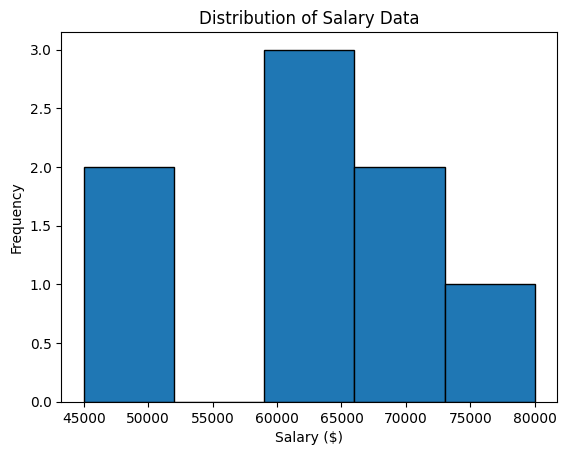

In [ ]:
plt.hist(df['salary($)'], bins=5, edgecolor='black')
plt.title("Distribution of Salary Data")
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.show()

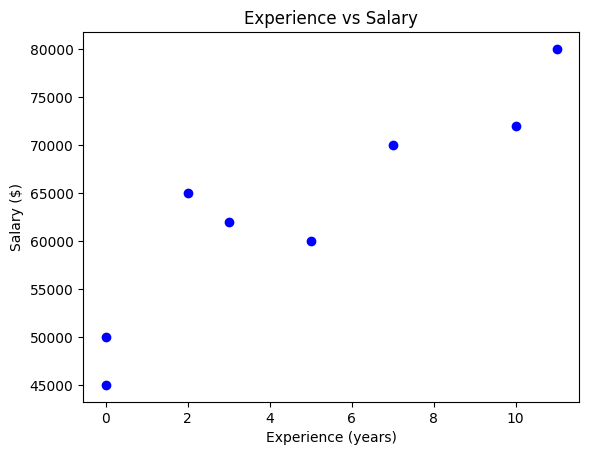

In [ ]:
df['experience'] = pd.to_numeric(df['experience'])
plt.scatter(df['experience'], df['salary($)'], color='blue')
plt.title("Experience vs Salary")
plt.xlabel("Experience (years)")
plt.ylabel("Salary ($)")
plt.show()

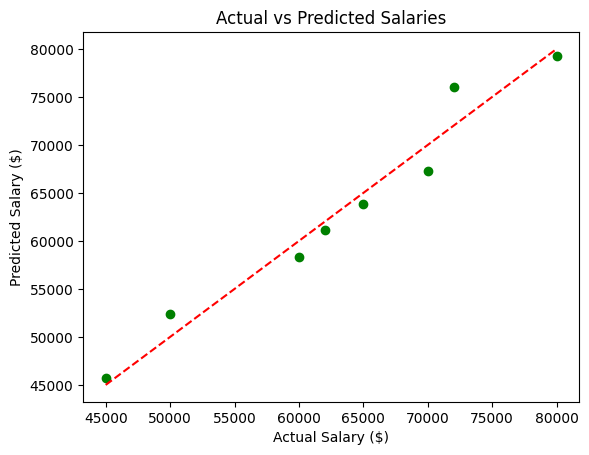

In [ ]:
y_pred = model.predict(X)

plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Actual Salary ($)")
plt.ylabel("Predicted Salary ($)")
plt.show()